# Seyed Ali Mirferdos
# 99201465


# 0. Importing the necessary modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# 1. Loading the data

In [ ]:
df = pd.read_csv('2019-2020 All leagues Stats.csv')

In [ ]:
df.head()

,League,Team,Season,KEY,Player,Position,Appearances,Goals,Started,Started As A Sub,Came On,Taken Off,Own Goals,Type Of Goal,First Half,Second Half,First Scorer,Last Scorer,Home,Away,Right Foot,Left Foot,Header,Other Method,Open Play,Cross,Free Kick,Direct Free Kick,Throw In,Penalty,Corner,Other Type Of Play,Minutes played,Min/goal,Assists,% Assists,Leading Recipient,Recipient Goals,CS,% Clean Sheets,Hat Tricks,Yellow Cards,Yellow - First Half,Yellow - Second Half,Yellow - Home,Yellow - Away,Yelow - Minutes Played,Minutes per Yellow Cards,Sent Off,Straight Red Card,Two Yellow Cards,Red - First Half,Red - Second Half,Red - Home,Red - Away,Red - Minutes Played,Minutes per Red Cards
0,Premier League,Liverpool,2019/20,Premier League|Liverpool|2019/20,NaN,NaN,NaN,59,NaN,NaN,NaN,NaN,NaN,Team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,6,3,-,-,5,8,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Premier League,Liverpool,2019/20,Premier League|Liverpool|2019/20,Virgil van Dijk,Defender,26,4,26,0,0,0,0,Player,4,-,2,-,4,-,-,-,4,-,-,-,1,-,-,-,3,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-,1,-,1,2340,2340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Premier League,Liverpool,2019/20,Premier League|Liverpool|2019/20,Trent Alexander-Arnold,Defender,26,2,25,1,1,2,0,Player,1,1,1,1,-,2,2,-,-,-,1,-,1,-,-,-,-,-,NaN,NaN,10.0,17.0,Virgil van Dijk,3.0,NaN,NaN,NaN,4,1,3,2,2,2280,570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Premier League,Liverpool,2019/20,Premier League|Liverpool|2019/20,Andrew Robertson,Defender,26,1,25,1,1,2,0,Player,-,1,-,-,-,1,-,-,1,-,-,1,-,-,-,-,-,-,NaN,NaN,6.0,10.0,Sadio Mane,2.0,NaN,NaN,NaN,1,-,1,-,1,2265,2265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Premier League,Liverpool,2019/20,Premier League|Liverpool|2019/20,Roberto Firmino,Midfielder,26,8,24,2,2,12,0,Player,3,5,2,4,-,8,3,3,2,-,4,1,1,-,-,-,2,-,2162.0,270.0,7.0,12.0,Mohamed Salah,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(3331, 57)

# 2. Selecting features

Replacing the - with nan:

In [ ]:
df.replace('-', np.nan, inplace=True)

Replacing the no data cells:

In [ ]:
df.replace('No data found', np.nan, inplace=True)

Removing the rows with type of goal not equal to player

In [ ]:
df2 = df[df['Type Of Goal'] == 'Player']
df2 = df2.drop('Type Of Goal', axis=1)

Removing the rows without a target:

In [ ]:
df2 = df2[~df2['Position'].isna()]

Remoing the Position and other not related columns:

In [ ]:
y_true = df2['Position']

In [ ]:
df2 = df2.drop(['Position', 'KEY', 'Player'], axis=1)

Missing Value Ratio Filter:

In [ ]:
df2 = df2.drop(df2.columns[df2.isna().sum() / len(df2) > 0.8], axis=1)

Label Encoding:

In [ ]:
null_mask = df2.isnull()

In [ ]:
df2 = df2.astype(str).apply(LabelEncoder().fit_transform).where(~null_mask, df2)

Filling the NaN values:

In [ ]:
df2 = df2.fillna(df2.mode().loc[0])

Preprocessing the target:

In [ ]:
y_true.replace(list(y_true.unique()), list(range(4)), inplace=True)

# 3. Clustering using kmeans

In [ ]:
kmeans = KMeans(n_clusters=4).fit(df2)

In [ ]:
y_pred = kmeans.predict(df2)

# 4. Visualizing the results

In [ ]:
df2.head()

,League,Team,Season,Appearances,Goals,Started,Started As A Sub,Came On,Taken Off,Own Goals,First Half,Second Half,First Scorer,Last Scorer,Home,Away,Right Foot,Open Play,Yellow Cards,Yellow - First Half,Yellow - Second Half,Yellow - Home,Yellow - Away,Yelow - Minutes Played,Minutes per Yellow Cards
1,3,59,0,19,16,19,0,0,0,0,5,0,1,0,8,0,0,0,0,0,0,0,0,682,408
2,3,59,0,19,11,18,1,1,9,0,0,0,0,0,0,4,8,0,6,0,2,1,1,674,1083
3,3,59,0,19,1,18,1,1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,672,386
4,3,59,0,19,20,17,12,11,4,0,4,7,1,3,0,10,10,8,0,0,0,0,0,682,517
5,3,59,0,18,11,18,0,0,2,0,0,4,0,1,0,0,8,6,0,0,0,0,0,682,517


predictions:

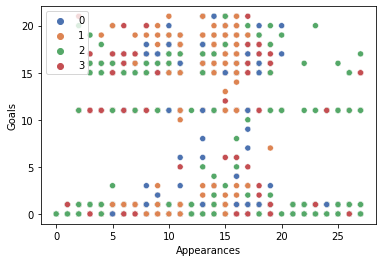

In [25]:
sns.scatterplot(x='Appearances', y='Goals', data=df2, 
                hue=y_pred, palette="deep")

Ground truth:

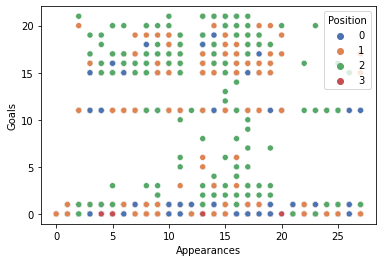

In [26]:
sns.scatterplot(x='Appearances', y='Goals', data=df2, 
                hue=y_true, palette="deep")